# Exploring the collected training data

In [1]:
# imports
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import random
import csv

%matplotlib inline

In [5]:
data_list = []
DATA_DIR = '../data/data/driving_log.csv'
with open(DATA_DIR, 'rt') as f:
    # ignore first line if header
    img_data = csv.reader(f)
    firstline = 0
    for line in img_data:
        if firstline == 0:
            firstline = 1
        else:
            # random lose 60% of zero angle data
            if (float(line[3]) != 0):
                data_list.append(line)
            else:
                if (random.random() > 0.6):
                    data_list.append(line)

print(len(data_list))

5360


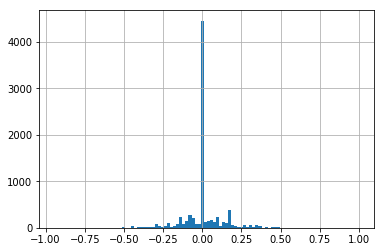

In [10]:
df = pd.read_csv(DATA_DIR, header=0, names=['center','left','right','angle','speed','brake','other'])
df['angle'].hist(bins=100)

In [7]:
'non-zero angles = {0} and zero angles = {1}'.format(df[df['angle'] != 0].shape[0], df[df['angle'] == 0].shape[0] * 1)

'non-zero angles = 3675 and zero angles = 4361'

In [3]:
IMG_LOAD = 2000
IMG_ANGLE = 'left'
print(df.shape)
print(df.iloc[IMG_LOAD][IMG_ANGLE].split('\\')[-1])

(2272, 7)
left_2018_03_07_21_39_37_192.jpg


In [4]:
img = cv2.imread('../IMG/'+df.iloc[IMG_LOAD][IMG_ANGLE].split('\\')[-1])
img.shape

(160, 320, 3)

In [9]:
angle = df.iloc[IMG_LOAD]['angle'] - 0.20
print(angle)
angle = 1.5708 * angle - 1.5708
pt1 = (160,np.int_(np.floor(img.shape[1]/2)))
pt2 = (np.int_(np.floor(pt1[1] + 80 * np.cos(angle))), np.int_(np.floor(pt1[0] + 80 * np.sin(angle))))
print(pt1, pt2)
img = cv2.line(img, pt1, pt2, (0,255,0), thickness=3) 

-0.2
(160, 160) (135, 83)


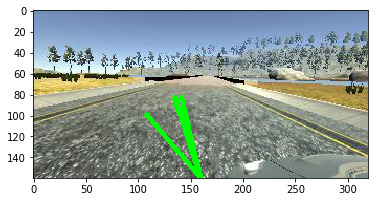

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
# let's try balancing
...